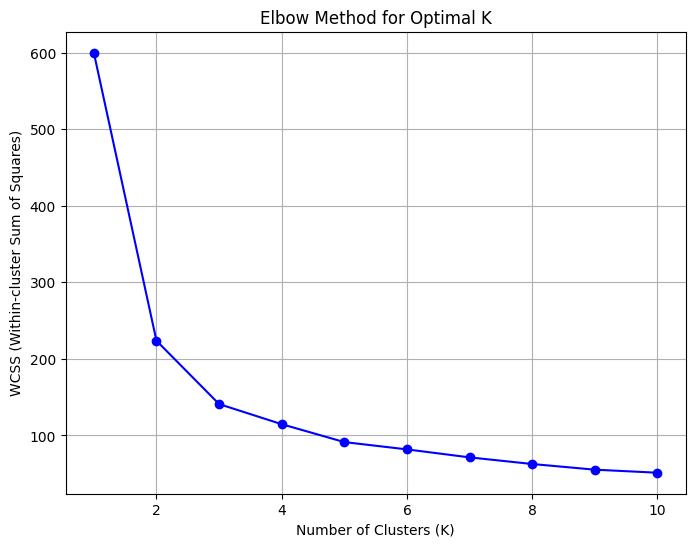

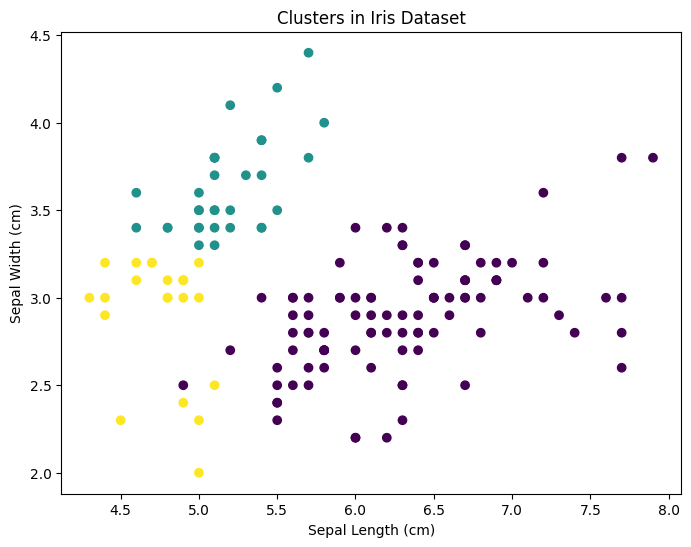

"Cluster Visualization:\nplt.figure(...): Initializes a new plot with specified size.\nplt.scatter(...): Creates a scatter plot using SepalLengthCm and SepalWidthCm as the x and y axes.\nc=df['Cluster']: Colors points based on their cluster label.\ncmap='viridis': Uses the viridis color map for visually distinct clusters.\nplt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels and title.\nplt.show(): Displays the scatter plot, where each cluster is represented by a different color."

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

'''pandas and numpy: Libraries for data handling and numerical computations.
matplotlib.pyplot: Used to visualize data through plots.
KMeans and StandardScaler from sklearn: Tools for clustering and data scaling.
warnings.filterwarnings("ignore"): Suppresses warnings for a cleaner output.'''



# Load the Iris dataset
df = pd.read_csv("iris (1).csv")
df = df.drop(columns=['Id', 'Species'])  # Drop irrelevant columns

# Step 1: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

'''StandardScaler(): Initializes the scaler to standardize features (mean=0, variance=1).
scaler.fit_transform(df): Fits the scaler to the data and transforms it. This helps ensure that all features contribute equally to the clustering.'''

# Step 2: Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=5, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
'''Elbow Method to Find Optimal K:
wcss = []: Initializes an empty list to store within-cluster sum of squares (WCSS) values for each K.
for k in range(1, 11): Loops over a range of K values (1 to 10) to test different numbers of clusters.
KMeans(...): Initializes the KMeans algorithm with specified parameters:
n_clusters=k: Sets the number of clusters to test.
init='k-means++': Optimizes initial cluster placement for faster convergence.
max_iter=200: Limits to 200 iterations to reach convergence.
n_init=5: Runs the algorithm five times and selects the best result.
random_state=42: Ensures reproducibility.
kmeans.fit(scaled_data): Applies KMeans clustering on the scaled data.
wcss.append(kmeans.inertia_): Adds the WCSS (sum of squared distances within each cluster) for each K value to the wcss list.'''

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

'''Plot Elbow Curve:
plt.figure(...): Initializes a plot with a specified size (8x6 inches).
plt.plot(...): Plots K values (x-axis) against WCSS values (y-axis).
marker='o': Marks each data point with a circle for clarity.
color='b': Sets the color of the line to blue.
plt.title(...), plt.xlabel(...), plt.ylabel(...): Adds title and axis labels.
plt.grid(True): Displays a grid on the plot for readability.
plt.show(): Renders the elbow curve plot, showing where WCSS sharply decreases to identify optimal K.'''

# Step 4: Fit KMeans with optimal number of clusters (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

'''Apply KMeans with Optimal K:
KMeans(n_clusters=3, random_state=42): Initializes KMeans with 3 clusters (chosen based on the elbow curve) and a fixed random seed.
kmeans.fit(scaled_data): Fits the KMeans algorithm to the scaled data.
df['Cluster'] = kmeans.labels_: Adds a new column, Cluster, to df, labeling each sample with its assigned cluster.'''

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters in Iris Dataset')
plt.show()

'''Cluster Visualization:
plt.figure(...): Initializes a new plot with specified size.
plt.scatter(...): Creates a scatter plot using SepalLengthCm and SepalWidthCm as the x and y axes.
c=df['Cluster']: Colors points based on their cluster label.
cmap='viridis': Uses the viridis color map for visually distinct clusters.
plt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels and title.
plt.show(): Displays the scatter plot, where each cluster is represented by a different color.'''


In [34]:
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:

kmeans.cluster_centers_

array([[ 0.57100359, -0.36600236,  0.69108416,  0.66322635],
       [-0.80601877,  1.33577362, -1.28618375, -1.21026347],
       [-1.31926109, -0.34584225, -1.14482725, -1.1336954 ]])

In [ ]:
'''Absolutely! Here’s an in-depth explanation of how K-means clustering works, with real-world applications.

### How K-means Clustering Works

K-means is an **unsupervised machine learning algorithm** used for grouping similar data points into clusters. Here’s a breakdown of the process in stages:

1. **Data Standardization**: 
   - First, features are standardized (or normalized) to make sure they have similar scales. This is crucial because K-means uses distances (e.g., Euclidean distance) to group data. Features like "height in cm" and "weight in kg" might have different ranges, which would bias the clustering if not scaled.

2. **Choosing the Number of Clusters (K)**:
   - We don't know the ideal number of clusters initially. K-means requires us to set **K** (number of clusters) beforehand.
   - The **Elbow Method** is often used to find the best K by plotting WCSS (Within-Cluster Sum of Squares) for different K values and looking for a point where the WCSS sharply decreases (the “elbow”). This elbow point usually suggests a good K value.

3. **Clustering Process**:
   - For a given K, the algorithm randomly selects K points as initial **centroids** (representative points of each cluster).
   - Each data point is assigned to the nearest centroid, forming clusters.
   - The algorithm then recalculates centroids as the mean of all points in each cluster.
   - Steps 2 and 3 are repeated until the centroids stop changing, indicating that the algorithm has converged.

4. **Assigning Clusters**:
   - After convergence, each data point has been assigned to a specific cluster. This assignment reveals patterns and groups in the data, with points in the same cluster having similar characteristics.

5. **Visualization**:
   - Visualizing clusters on a graph can help us understand patterns, relationships, and group distributions within the data.

### Real-World Applications of K-means Clustering

Here are some practical scenarios where K-means clustering can be helpful:

1. **Customer Segmentation**:
   - Businesses use K-means to segment customers based on purchasing behavior. For example, an online retailer can cluster users by shopping habits, preferences, and spending amounts. This helps in targeted marketing (e.g., offering high-end products to big spenders).

2. **Document Clustering**:
   - K-means is used to categorize documents, such as grouping news articles by topic. Each document is represented by its content (using word frequencies or embeddings), and the algorithm clusters similar articles together (e.g., sports, politics, technology).

3. **Image Compression**:
   - In image processing, K-means can reduce colors in an image by clustering similar colors. For instance, an image with millions of colors can be compressed to just a few dominant colors. This technique is often used in graphic design and image compression tools.

4. **Anomaly Detection in Security**:
   - K-means clustering is applied in cybersecurity to identify unusual patterns in network traffic or user behavior. Normal behaviors form clusters, and any data point far from these clusters may represent a security threat or anomaly.

5. **Geographic Data and Planning**:
   - City planners can use K-means to analyze population data, dividing a city into areas with similar characteristics (e.g., population density, household income). This helps in urban planning, such as deciding where to build new schools or hospitals.

6. **Social Media Analysis**:
   - Companies analyze social media data to understand user groups and trends. For example, Twitter users can be clustered based on topics they frequently discuss, allowing companies to tailor content or marketing efforts to each group.

In summary, K-means is great for **finding natural groupings in data**. It doesn’t need predefined labels, so it’s ideal when working with data that’s unlabeled or when discovering patterns. The key is that data points within the same cluster share more similarities with each other than with those in other clusters, allowing for meaningful groupings in various domains.'''